In [1]:
include("./Functions.jl")
using .GPLM
using Random
using Plots
using LinearAlgebra
using Distributions

期待値

In [2]:
x=[1,2,3,4,5,6,7,8,9,10]
p(x)=1/length(x)

p (generic function with 1 method)

In [3]:
E=sum([el*p(x) for el in x])

5.500000000000001

共分散行列

In [4]:
X=[
    1 1 1 1
    2 2 2 2
    3 3 3 3
]
[GPLM.ExpectedValue(x) for i in 1:length(x)]

10-element Array{Float64,1}:
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001
 5.500000000000001

In [5]:
hcat([GPLM.MeanVector(X[:,i]) for i in 1:size(X,2)]...)'

4×3 Adjoint{Float64,Array{Float64,2}}:
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0
 2.0  2.0  2.0

In [6]:
X=[
    40 80
    80 90
    90 100
]
# GPLM.MeanVector(X[2,:])
GPLM.MeanMatrix(X)

3×2 Array{Float64,2}:
 70.0  90.0
 70.0  90.0
 70.0  90.0

In [7]:
Σ=[]
M=GPLM.MeanMatrix(X)
print(M)
for i in 1:size(X,2)
    row=[]
    for j in 1:size(X,2)
        println([(X[k,i]-M[k,i])*(X[k,j]-M[k,j]) for k in 1:size(X,1)])
        σ=GPLM.ExpectedValue([(X[k,i]-M[k,i])*(X[k,j]-M[k,j]) for k in 1:size(X,1)])
        
        push!(row,σ)
    end
    push!(Σ,row)
end
Σ

[70.0 90.0; 70.0 90.0; 70.0 90.0][900.0, 100.0, 400.0]
[300.0, 0.0, 200.0]
[300.0, 0.0, 200.0]
[100.0, 0.0, 100.0]


2-element Array{Any,1}:
 Any[466.66666666666663, 166.66666666666666]
 Any[166.66666666666666, 66.66666666666666]

In [8]:
GPLM.CovarianceMatrix(X)

3×3 Array{Float64,2}:
 466.667  166.667   0.0
 166.667   66.6667  0.0
   0.0      0.0     0.0

In [9]:
N(x,μ,Σ)=exp(-1/2*(x-μ)'*inv(Σ)*(x-μ))/((2π)^length(x)*det(Σ))^(1/2)

N (generic function with 1 method)

In [10]:
Σ=[
    1 -0.9
    -0.9 1
]
μ=[0,0]
x=[0,0]
# (x-μ)'*inv(Σ)*(x-μ)
# N([0,0],μ,Σ)
x1=-4:0.01:4
x2=-4:0.01:4
ya = [N([i,j],μ,Σ) for i in x1, j in x2]'

801×801 Adjoint{Float64,Array{Float64,2}}:
 1.1894e-70   1.7739e-70   2.64426e-70  …  8.20834e-5   8.03946e-5
 1.7739e-70   2.6444e-70   3.94e-70        8.38475e-5   8.20834e-5
 2.64426e-70  3.94e-70     5.8676e-70      8.56043e-5   8.37636e-5
 3.93959e-70  5.86729e-70  8.73364e-70     8.7352e-5    8.54333e-5
 5.86636e-70  8.73272e-70  1.29928e-69     8.90885e-5   8.70904e-5
 8.73088e-70  1.29907e-69  1.93188e-69  …  9.08117e-5   8.87329e-5
 1.29873e-69  1.93147e-69  2.87097e-69     9.25196e-5   9.03588e-5
 1.93086e-69  2.87021e-69  4.26431e-69     9.42099e-5   9.19661e-5
 2.86916e-69  4.26297e-69  6.33054e-69     9.58807e-5   9.35527e-5
 4.26117e-69  6.32821e-69  9.393e-69       9.75297e-5   9.51167e-5
 6.32522e-69  9.38905e-69  1.39296e-68  …  9.91549e-5   9.66559e-5
 9.38411e-69  1.3923e-68   2.06465e-68     0.000100754  9.81683e-5
 1.3915e-68   2.06356e-68  3.05861e-68     0.000102325  9.96519e-5
 ⋮                                      ⋱               ⋮
 9.81683e-5   0.000100754  0

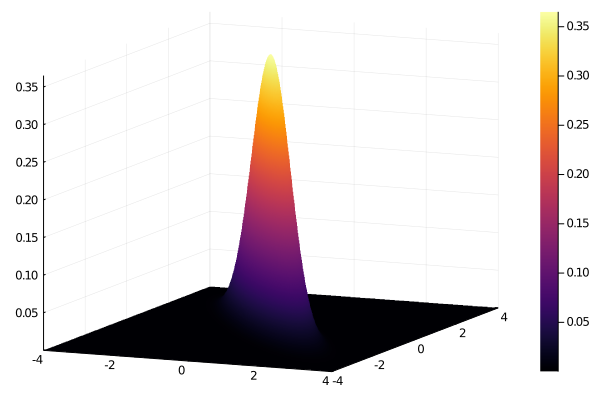

In [11]:
plot(x1,x2,ya, st=:surface)

In [12]:
μ=[0,0]
x=[0,0]
x1=-4:0.01:4
x2=-4:0.01:4
ya = [GPLM.GaussianDistribution([i,j]) for i in x1, j in x2]'

801×801 Adjoint{Float64,Array{Float64,2}}:
 1.79105e-8  1.86405e-8  1.93984e-8  …  1.93984e-8  1.86405e-8  1.79105e-8
 1.86405e-8  1.94003e-8  2.0189e-8      2.0189e-8   1.94003e-8  1.86405e-8
 1.93984e-8  2.0189e-8   2.10098e-8     2.10098e-8  2.0189e-8   1.93984e-8
 2.0185e-8   2.10077e-8  2.18618e-8     2.18618e-8  2.10077e-8  2.0185e-8
 2.10014e-8  2.18574e-8  2.2746e-8      2.2746e-8   2.18574e-8  2.10014e-8
 2.18486e-8  2.27392e-8  2.36636e-8  …  2.36636e-8  2.27392e-8  2.18486e-8
 2.27278e-8  2.36542e-8  2.46158e-8     2.46158e-8  2.36542e-8  2.27278e-8
 2.364e-8    2.46035e-8  2.56037e-8     2.56037e-8  2.46035e-8  2.364e-8
 2.45863e-8  2.55884e-8  2.66287e-8     2.66287e-8  2.55884e-8  2.45863e-8
 2.55679e-8  2.661e-8    2.76919e-8     2.76919e-8  2.661e-8    2.55679e-8
 2.65861e-8  2.76697e-8  2.87946e-8  …  2.87946e-8  2.76697e-8  2.65861e-8
 2.76421e-8  2.87687e-8  2.99383e-8     2.99383e-8  2.87687e-8  2.76421e-8
 2.87371e-8  2.99084e-8  3.11243e-8     3.11243e-8  2.99084e

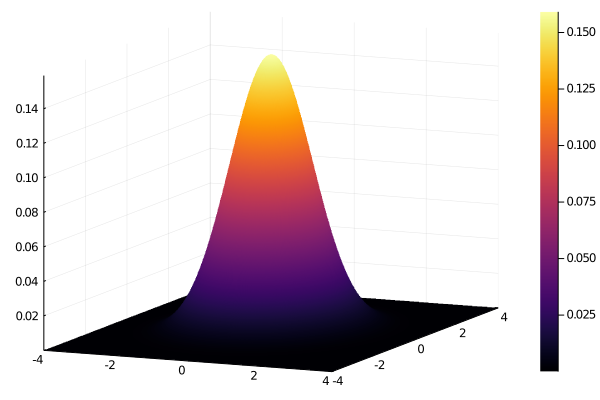

In [13]:
plot(x1,x2,ya, st=:surface)